In [1]:
# Librairies utiles
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from IPython.core.display import Image, display
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.grid_search import GridSearchCV

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

import warnings
# suppression des messages d'erreurs
warnings.filterwarnings('ignore')


/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/anaconda/lib/python3.6/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:

hidden_layer_sizes = []

i_max=10
j_max=10

a = np.array(range (1,i_max))
b = np.array(range (1,j_max))

ecart_i = 100
ecart_j = 100

for i in a : 
    hidden_layer_sizes.append((i*ecart_i,))
    for j in b :
        hidden_layer_sizes.append((i*ecart_i,j*ecart_j))
        
# affichage des couches de neurones que l'on va tester
hidden_layer_sizes

[(100,),
 (100, 100),
 (100, 200),
 (100, 300),
 (100, 400),
 (100, 500),
 (100, 600),
 (100, 700),
 (100, 800),
 (100, 900),
 (200,),
 (200, 100),
 (200, 200),
 (200, 300),
 (200, 400),
 (200, 500),
 (200, 600),
 (200, 700),
 (200, 800),
 (200, 900),
 (300,),
 (300, 100),
 (300, 200),
 (300, 300),
 (300, 400),
 (300, 500),
 (300, 600),
 (300, 700),
 (300, 800),
 (300, 900),
 (400,),
 (400, 100),
 (400, 200),
 (400, 300),
 (400, 400),
 (400, 500),
 (400, 600),
 (400, 700),
 (400, 800),
 (400, 900),
 (500,),
 (500, 100),
 (500, 200),
 (500, 300),
 (500, 400),
 (500, 500),
 (500, 600),
 (500, 700),
 (500, 800),
 (500, 900),
 (600,),
 (600, 100),
 (600, 200),
 (600, 300),
 (600, 400),
 (600, 500),
 (600, 600),
 (600, 700),
 (600, 800),
 (600, 900),
 (700,),
 (700, 100),
 (700, 200),
 (700, 300),
 (700, 400),
 (700, 500),
 (700, 600),
 (700, 700),
 (700, 800),
 (700, 900),
 (800,),
 (800, 100),
 (800, 200),
 (800, 300),
 (800, 400),
 (800, 500),
 (800, 600),
 (800, 700),
 (800, 800),
 (800

In [3]:
# Configuration des paramètres que l'on souhaite tester

tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']

len(hidden_layer_sizes)


90

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import numpy as np


def draw(ylim, clf, i_max=9, j_max=9, ecart_i=50, ecart_j=50):
    # Configuration de la présentation des axes
    plt.ylim(ylim)

    axes = plt.gca()

    # Récupération de tout les scores
    scores = [ mean_score.mean() for params, mean_score, mean_score in clf.grid_scores_ ]

    # Scores avec traitement supplémentaires
    scores2 = []
    legend2 = []
    colors2 = ['#e6194b', '#3cb44b','#ffe119','#0082c8','#f58231','#911eb4','#46f0f0','#f032e6','#d2f53c','#000000']
    x = np.arange(0,i_max*ecart_i,ecart_i)
    for i in range (0,i_max-1) :
        scores2.append([])
        for j in range (0,j_max) :
            scores2[i].append(scores[i * i_max + j])

        plt.plot(x, scores2[i], color=colors2[i])
        legend2.append("Hidden Layer Size : (" + str((i+1)*ecart_i) +", x)")


    plt.legend(legend2) 

    fig = plt.gcf()
    fig.set_size_inches(18.5, 10.5)

    plt.show()




# Dataset BRUT

In [5]:
# récupération de variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET BRUT)
%store -r activity_dataset_full
%store -r colonnes_source
%store -r colonnes_cible
%store -r source
%store -r cible

In [6]:
# cration d'un jeu de données de test et d'entrainement
source_train, source_test, cible_train, cible_test = train_test_split(source, cible, test_size=0.7)


In [7]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_full['Action']))
display(source_train, source_test, cible_train, cible_test)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
541,-0.145325,-0.533188,-0.251862,-0.023224,1.214584,1.659912,1.767639,2.725327,3.146713,5.404434,...,-2.939514,-1.477859,1.451447,1.620239,1.128235,1.008530,2.579117,0,0,1
232,-0.309326,-0.788162,-0.648102,-0.681625,-0.707962,-0.630142,-0.183624,-1.253830,-0.844421,0.352676,...,4.905090,4.543564,3.340469,2.677277,2.132599,2.016479,1.862061,0,0,1
83,-0.309326,-0.062714,-0.189621,-0.071106,-0.114197,-0.178833,-0.139328,-0.144119,-0.072296,-0.201584,...,8.981216,8.986008,8.991989,8.948898,8.956070,8.980011,8.999176,0,0,1
274,-0.039978,-0.870758,-0.885132,-1.756622,0.683075,0.491531,-0.418259,2.149521,4.051712,-2.189972,...,9.558212,7.105362,6.403854,2.119431,0.018524,-13.989960,-12.323593,0,0,1
336,0.759689,0.886581,0.797989,0.845886,0.826721,0.850662,0.819550,0.829117,0.835098,0.831512,...,8.647217,8.588562,8.617294,8.620880,8.683136,8.550262,8.641235,0,0,1
88,-0.223129,-0.014832,-0.176453,-0.114197,-0.092651,-0.104614,-0.085464,-0.123779,-0.115387,-0.107010,...,9.091354,9.109299,9.066208,9.090149,9.084167,9.094940,9.078186,0,0,1
31,0.098892,-0.126160,0.911713,-0.229111,1.307953,1.877777,-0.836044,0.066559,2.398514,2.366196,...,2.170914,-4.378433,-34.732117,-13.727783,-8.199585,1.552002,0.369278,0,0,1
79,-0.757034,-1.197571,0.329926,0.200638,-0.328476,0.176697,0.625610,-0.690002,0.040237,0.018677,...,7.729050,7.148453,8.046280,8.098953,9.303238,7.815231,7.632080,0,0,1
315,0.305984,0.192261,-0.304535,1.517456,1.012283,0.229370,-0.160889,1.336685,0.338303,11.235519,...,4.786575,2.849670,5.777771,2.832901,2.419907,9.507935,5.330063,0,0,1
306,2.433228,1.544983,0.234161,0.437668,2.459564,0.556183,-2.278549,-3.249405,6.223251,3.988266,...,9.738983,5.806503,5.421036,9.697083,4.946991,3.558350,7.757782,0,0,1


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,z14,z15,z16,z17,z18,z19,z20,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison
170,0.584915,0.786026,-0.723526,1.322327,-0.244675,0.264084,0.582520,-1.830841,0.437668,-0.888718,...,4.650101,4.836853,4.439407,4.366394,4.421463,4.079086,4.176056,0,0,1
482,0.702225,0.583710,1.043396,1.207397,1.510269,0.918900,-0.979706,-1.454956,-2.841187,-3.545090,...,1.112671,-0.559677,0.443497,1.464615,2.455811,1.808182,0.730789,0,0,1
52,0.369431,-0.050751,-0.221939,-0.436218,1.142761,2.461960,-0.705566,-2.069061,-3.695923,-6.558197,...,-6.520050,-5.773056,-5.802979,-5.943039,-5.442657,-6.298584,-7.061142,0,0,1
81,-0.136948,-0.109406,-0.105820,-0.108215,-0.108215,-0.110611,-0.107010,-0.084274,-0.118988,-0.111801,...,9.849106,9.855103,9.838333,9.839539,9.856293,9.851501,9.851501,0,0,1
549,-9.645508,-9.297150,-9.803528,-9.971130,-10.548126,-11.620728,-10.463135,-11.358566,-11.055695,-10.111191,...,1.959015,4.160492,1.650162,2.983734,2.965790,2.370819,3.230347,0,0,1
140,-24.484772,-28.638718,-29.681396,-16.002121,-7.227371,3.028198,4.422821,-9.765228,-34.460220,-25.960800,...,2.722778,1.062393,2.855652,3.830093,4.465744,4.304138,4.075500,0,0,1
259,-0.033997,0.031845,0.422104,0.523865,0.461609,1.260071,0.455627,2.269226,3.404083,6.890045,...,-1.052887,4.968536,4.701584,18.334167,6.697144,7.451324,8.674759,0,0,1
364,-0.566696,-0.989273,-0.231506,2.513443,-1.539948,-2.045120,-0.290176,-0.934204,-4.460876,-6.322357,...,8.429352,6.298508,10.778061,12.753281,12.202606,7.858337,7.266968,0,0,1
439,-9.281601,-9.515030,-9.935211,-11.049713,-11.286743,-13.653412,-9.705368,-10.538544,-10.266815,-6.029068,...,1.862061,0.585953,1.943451,2.217590,2.480957,2.638977,2.759888,0,0,1
281,-1.428619,-0.518814,-1.261017,-0.151306,0.740540,0.150360,3.353806,2.612793,1.451614,0.747711,...,6.476883,12.544983,9.764114,7.964874,11.874603,4.668060,7.166412,0,0,1


,Action
541,S'allonger (depuis position assise)
232,Se lever (chaise)
83,Ne rien faire
274,S'allonger (depuis position debout)
336,Ne rien faire
88,Ne rien faire
31,S'allonger (depuis position debout)
79,Marcher
315,Courrir
306,Courrir


,Action
170,S'assoir (chaise)
482,S'allonger (depuis position assise)
52,S'allonger (depuis position assise)
81,Ne rien faire
549,S'assoir (depuis position allongée)
140,Sauter
259,Sauter
364,Se lever (depuis position allongée)
439,S'assoir (depuis position allongée)
281,S'allonger (depuis position debout)


In [8]:
warnings.filterwarnings('ignore')

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf.fit(source_train, cible_train.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true, cible_pred = cible_test, clf.predict(source_test)
    print(classification_report(cible_true, cible_pred))
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s



[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] 

[CV] .......................... hidden_layer_sizes=(200, 100) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.5s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.4s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.5s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   0.8s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.8s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.7s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.7s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.8s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.8s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.1s
[CV] hidden_layer_sizes=(500, 600) ...................................
[CV] .......................... hidden_layer_sizes=(500, 600) -   1.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.6s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.0s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.0s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   1.5s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   1.5s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   1.4s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   1.6s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.9s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.6s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.5s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(700, 900) -   2.2s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.7s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.7s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   0.6s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.9s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  6.7min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.680 (+/-0.039) for {'hidden_layer_sizes': (100,)}
0.722 (+/-0.047) for {'hidden_layer_sizes': (100, 100)}
0.722 (+/-0.038) for {'hidden_layer_sizes': (100, 200)}
0.716 (+/-0.042) for {'hidden_layer_sizes': (100, 300)}
0.704 (+/-0.034) for {'hidden_layer_sizes': (100, 400)}
0.680 (+/-0.036) for {'hidden_layer_sizes': (100, 500)}
0.686 (+/-0.030) for {'hidden_layer_sizes': (100, 600)}
0.704 (+/-0.042) for {'hidden_layer_sizes': (100, 700)}
0.716 (+/-0.040) for {'hidden_layer_s

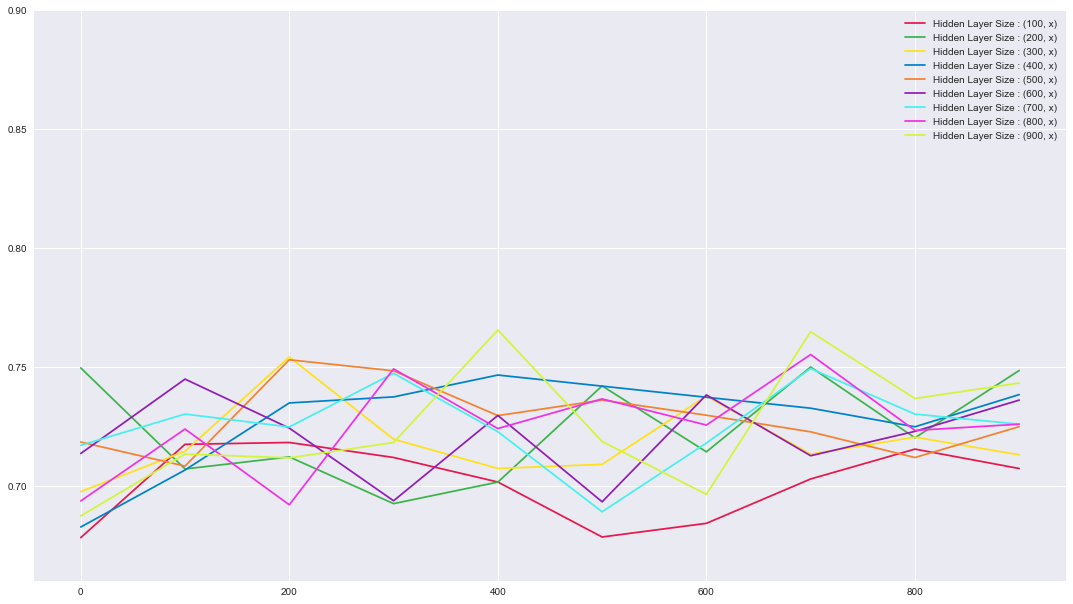

In [38]:
%matplotlib inline

# Affichage des courbes
draw([0.66,0.9], clf, i_max, j_max, ecart_i, ecart_j)


In [39]:
warnings.filterwarnings('ignore')

clf_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_demo.fit(source_train, cible_train.values.ravel())


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(900, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [46]:
warnings.filterwarnings('ignore')

for i in range(0,20):
    print("prédit : ", clf_demo.predict(source_test.values[i]),"\n attendu : ",cible_test.values[i])


prédit :  ['Ne rien faire'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Sauter']
prédit :  ['Courrir'] 
 attendu :  ['Sauter']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ["S'allonger (depuis position debout)"] 
 attendu :  ["S'allonger (depuis position debout)"]
prédit :  ['Marcher'] 
 attendu :  ['Sauter']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ['Courrir']
prédit :  ["S'assoi

# Dataset ANALYSE

In [12]:
# récupération des variables qui ont été stockées dans le noteBook "Pré-traitement" (DATASET ANALYSE)
%store -r activity_dataset_analysed
%store -r colonnes_source_analysed
%store -r colonnes_cible_analysed
%store -r source_analysed
%store -r cible_analysed


In [13]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed = train_test_split(source_analysed, cible_analysed, test_size=0.7)


In [14]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed, source_test_analysed, cible_train_analysed, cible_test_analysed)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
389,0.206635,-0.733093,-0.248276,1.618011,3.538162,1.963974,-4.961258,-3.157227,-0.943787,-3.712677,...,10.809189,10.809189,-9.313919,3.149353,-12.437317,-12.437317,3.668783,2.474892,8.121109,6.423213
545,-1.039551,-1.261017,-1.278976,-1.165253,-1.277771,-1.203552,-0.332062,1.348663,2.102829,3.666245,...,3.642151,13.093414,-1.278976,-2.475830,-6.284210,-6.284210,5.429088,4.491599,2.942764,4.837678
458,-1.785355,-1.274185,-1.002441,-0.991669,-0.934204,-0.855194,-1.227493,0.422104,-0.251862,-1.067093,...,12.811935,12.811935,-2.343201,3.859238,7.027542,-2.343201,1.006054,0.866762,1.636012,4.078363
511,1.112839,0.898544,0.223389,-0.815704,0.010300,-1.313690,0.724976,-5.653183,3.630341,-3.958084,...,38.412537,38.412537,-5.653183,-2.154404,-7.772812,-7.772812,2.294565,7.726116,10.912639,8.336780
273,0.310776,0.613647,1.482742,1.419296,2.618790,-1.014420,-1.981674,3.539352,-0.688797,0.022278,...,14.633926,14.633926,-3.749786,-0.643066,-12.586945,-12.586945,2.230126,2.890067,7.114003,4.981977
318,1.960373,2.664276,1.819122,2.378174,3.724899,2.396118,5.665405,2.306335,4.371338,0.563370,...,14.210144,14.210144,-1.116165,-0.055283,-2.348145,-2.348145,3.084937,3.228833,4.435987,3.898308
429,10.276642,11.782593,13.555496,11.862793,7.318604,4.573654,4.549713,5.414017,5.321838,2.666672,...,8.568207,13.555496,-3.073425,-3.309006,-1.578415,-3.309006,5.280511,4.475313,3.013349,4.380969
182,-0.358398,0.094101,0.177902,-0.195602,0.304794,-1.191589,-0.158493,-0.454178,0.151566,0.770462,...,8.753769,9.873474,-1.191589,7.164429,1.354477,-1.191589,0.532210,0.805478,1.732335,3.658982
409,0.255707,1.039810,1.032623,0.398163,0.053391,-1.035965,-1.879913,-4.308838,-5.167160,-3.252991,...,5.448563,9.114502,-13.896423,-6.366394,-3.866074,-13.896423,5.098061,5.101512,2.206789,5.859534
33,9.785828,10.184464,11.537186,9.399170,8.394791,11.680832,13.404663,12.061523,10.727951,5.786316,...,19.580338,19.580338,0.151566,-4.192459,-3.577576,-4.192459,4.540643,4.759001,5.878147,5.262250


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
81,-0.136948,-0.109406,-0.105820,-0.108215,-0.108215,-0.110611,-0.107010,-0.084274,-0.118988,-0.111801,...,9.926926,9.926926,-0.136948,-0.463501,9.821579,-0.463501,0.010028,0.008045,0.021224,4.818939
198,-0.045959,0.056992,-0.139328,-0.359604,0.089310,-0.614578,-0.983292,-0.001663,-0.144119,0.656738,...,7.209503,10.553421,-0.983292,6.637711,-0.238861,-0.983292,0.504884,0.975374,1.817303,3.918249
542,0.702225,0.583710,1.043396,1.207397,1.510269,0.918900,-0.979706,-1.454956,-2.841187,-3.545090,...,4.094650,9.379074,-11.933167,0.062027,-3.414764,-11.933167,4.929393,3.386180,1.903283,5.595693
107,2.072906,1.523438,-1.083847,-11.782333,-12.586792,-8.270050,-3.590576,-2.479660,-17.595459,-39.300095,...,30.499100,30.499100,-39.300095,-8.734268,-4.377228,-39.300095,9.420826,5.103749,8.074191,9.046932
449,0.760880,0.370636,-0.037582,-0.585861,-1.251434,-4.567413,-2.241440,-9.792755,-3.193146,-1.018005,...,38.419128,38.419128,-9.792755,-5.866013,-7.141342,-9.792755,2.537123,9.219610,9.643705,8.932264
150,1.268448,0.691452,-1.034760,-0.273407,0.215012,-0.391922,-0.294952,-0.727112,-3.132080,-1.798523,...,12.081711,12.081711,-3.132080,1.629044,7.362732,-3.132080,1.057699,1.043242,1.221134,3.950761
19,0.563370,0.574142,-0.073502,0.340698,0.435272,0.288025,-0.607407,-0.039978,-0.042374,0.198242,...,13.710953,13.710953,-0.607407,4.818115,5.263016,-0.607407,0.389043,0.979522,2.042039,3.456432
319,0.249725,1.409714,0.392181,0.198242,3.376556,1.652725,4.542526,4.815460,1.440842,5.546890,...,19.551620,19.551620,-3.439743,-1.999374,0.013733,-3.439743,2.386390,3.771419,5.383590,4.603277
8,0.446045,0.211411,0.108459,-0.189621,-0.077087,0.341904,-0.041168,-0.728302,-0.229111,-0.387131,...,14.006638,14.006638,-0.885132,3.659317,3.834885,-0.885132,0.384229,1.233144,2.622582,3.736908
432,0.396973,-0.059128,-0.324890,0.302399,0.379013,1.330704,-0.615784,-1.340027,-0.217148,-0.613388,...,7.962479,11.712219,-2.456924,0.033295,-15.803558,-15.803558,1.526915,3.087403,8.402748,5.891023


,Action
389,Se lever (depuis position allongée)
545,S'allonger (depuis position assise)
458,Marcher
511,Sauter
273,S'allonger (depuis position debout)
318,Courrir
429,S'assoir (depuis position allongée)
182,S'assoir (chaise)
409,S'allonger (depuis position assise)
33,Se lever (depuis position allongée)


,Action
81,Ne rien faire
198,S'assoir (chaise)
542,S'allonger (depuis position assise)
107,Sauter
449,Sauter
150,Marcher
19,Se lever (chaise)
319,Courrir
8,S'assoir (chaise)
432,S'assoir (depuis position allongée)


In [15]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed.fit(source_train_analysed, cible_train_analysed.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed, cible_pred_analysed = cible_test_analysed, clf_analysed.predict(source_test_analysed)
    print(classification_report(cible_true_analysed, cible_pred_analysed))
    print()

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.0s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.2s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.4s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.1s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.6s
[CV] hidden_layer_sizes=(300, 500) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   0.6s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.7s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.7s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   0.8s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.0s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.8s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.2s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.3s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.3s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   0.2s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   1.5s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   1.3s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   0.5s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   0.3s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   0.3s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.8s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.9s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   1.8s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   0.1s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.5s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.6s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.1s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.6s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.2s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.1s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   0.8s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.0s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .......................... hidden_layer_sizes=(900, 300) -   1.5s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed:  5.5min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.710 (+/-0.088) for {'hidden_layer_sizes': (100,)}
0.763 (+/-0.033) for {'hidden_layer_sizes': (100, 100)}
0.799 (+/-0.028) for {'hidden_layer_sizes': (100, 200)}
0.787 (+/-0.019) for {'hidden_layer_sizes': (100, 300)}
0.805 (+/-0.026) for {'hidden_layer_sizes': (100, 400)}
0.787 (+/-0.037) for {'hidden_layer_sizes': (100, 500)}
0.817 (+/-0.023) for {'hidden_layer_sizes': (100, 600)}
0.757 (+/-0.031) for {'hidden_layer_sizes': (100, 700)}
0.781 (+/-0.027) for {'hidden_layer_s

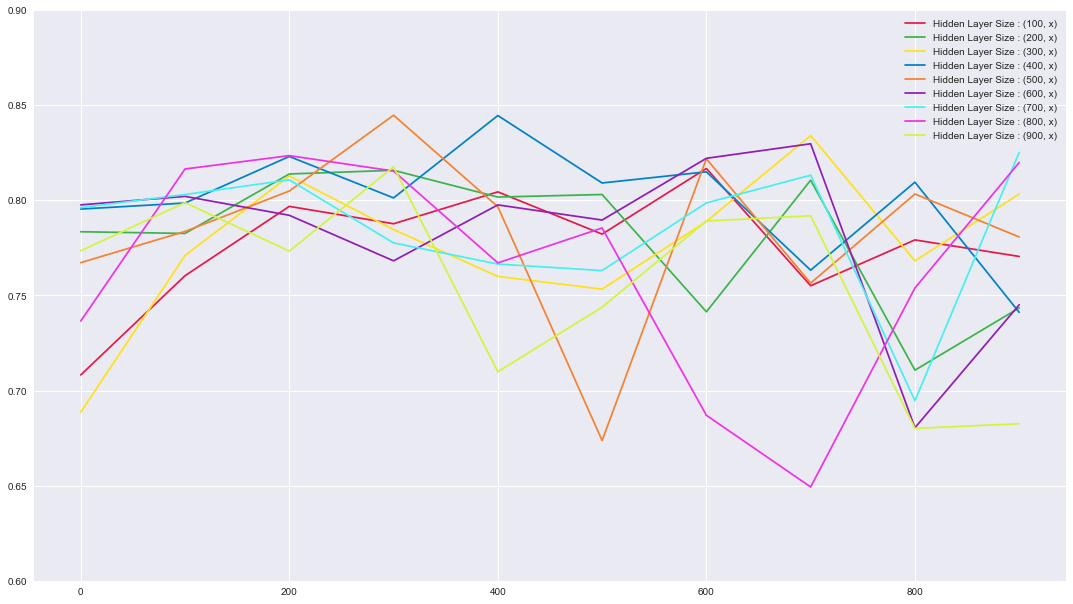

In [35]:
%matplotlib inline

# Affichage des courbes
draw([0.6,0.9], clf_analysed, i_max, j_max, ecart_i, ecart_j)


In [36]:
# TODO copier coller le best classifier
clf_analysed_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_demo.fit(source_train_analysed, cible_train_analysed.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(400, 400), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [45]:

for i in range(0,20):
    print("prédit : ", clf_analysed_demo.predict(source_test_analysed.values[i]),"\n attendu : ",cible_test_analysed.values[i])


prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Se lever (chaise)'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'allonger (depuis position assise)"] 
 attendu :  ["S'allonger (depuis position assise)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Se lever (chaise)']
prédit :  ['Se lever (chaise)'] 
 attendu :  ['Courrir']
prédit :  ["S'assoir (chaise)"] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis posi


# Dataset ANALYSE 2

In [19]:

# Récupération des données analysé sans les données brutes (DONNEES ANALYSEES 2)
%store -r colonnes_source_analysed_2
%store -r colonnes_cible_analysed_2
%store -r source_analysed_2
%store -r cible_analysed_2

In [20]:
# cration d'un jeu de données de test et d'entrainement
source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2 = train_test_split(source_analysed_2, cible_analysed_2, test_size=0.7)


In [21]:
#[print('classe ',i,' : ',sum(cible_train==i)) for i in cible_train.values]

display(pd.Series.value_counts(activity_dataset_analysed['Action']))
display(source_train_analysed_2, source_test_analysed_2, cible_train_analysed_2, cible_test_analysed_2)


S'assoir (depuis position allongée)    66
Courrir                                60
S'allonger (depuis position assise)    59
Marcher                                57
Ne rien faire                          57
S'allonger (depuis position debout)    56
Sauter                                 56
S'assoir (chaise)                      52
Se lever (chaise)                      51
Se lever (depuis position allongée)    51
Name: Action, dtype: int64

,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_xyz,max_x,max_y,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
194,0,0,1,-0.357626,9.300898,2.978053,3.973775,0.606461,11.404556,6.943741,11.404556,-2.599380,7.306885,0.354904,-2.599380,0.757953,0.788252,1.754582,4.206186
77,0,0,1,0.066328,4.674522,8.467119,4.402656,2.259659,6.301315,9.798828,9.798828,-2.081039,2.690872,6.733063,-2.081039,0.934885,0.977755,0.867069,3.581981
133,0,0,1,-15.845239,-9.645678,2.237164,-7.751251,8.551620,36.303070,25.067856,36.303070,-39.862732,-38.746780,-10.414215,-39.862732,17.997028,18.145577,8.578589,17.066964
3,0,0,1,-0.015435,4.284267,8.801530,4.356787,0.815948,7.126129,13.204590,13.204590,-1.288559,1.834930,6.196762,-1.288559,0.493309,1.464407,1.868406,3.882257
164,1,0,0,-8.411480,-8.874625,3.209689,-4.692139,-1.032379,-3.816574,8.844742,8.844742,-13.738403,-16.414871,0.114288,-16.414871,3.525950,3.746607,2.362463,6.488939
537,0,0,1,4.640390,4.916154,3.154984,4.237176,20.230530,14.534973,10.545822,20.230530,-4.271729,-6.621384,-2.884445,-6.621384,6.337014,5.964886,3.925528,5.473658
230,0,0,1,-0.001011,9.303890,3.321561,4.208146,1.547379,10.316391,6.231476,10.316391,-1.331650,8.293289,2.333710,-1.331650,0.711514,0.461627,1.030005,3.955725
39,0,0,1,5.442866,4.200768,2.676204,4.106613,12.797729,8.831985,6.916214,12.797729,-2.158844,-1.349350,-1.621506,-2.158844,5.258753,3.986856,2.976015,4.263617
504,0,0,1,-0.685632,5.974752,-4.343716,0.315134,0.602875,9.983597,3.381180,9.983597,-1.869141,0.606705,-12.914963,-12.914963,0.751426,3.969804,5.372172,5.753781
343,0,0,1,0.788300,4.909094,8.584913,4.760769,0.863831,4.962967,8.692719,8.692719,0.691452,4.852829,8.414978,0.691452,0.047269,0.032763,0.066399,3.211944


,Lieux_Ecole,Lieux_Exterieur,Lieux_Maison,moyenne_x,moyenne_y,moyenne_z,moyenne_xyz,max_x,max_y,max_z,max_xyz,min_x,min_y,min_z,min_xyz,ecart_type_x,ecart_type_y,ecart_type_z,ecart_type_xyz
553,0,0,1,-6.463319,3.885152,0.997328,-0.526946,2.025024,9.298859,2.381592,9.298859,-12.288712,-0.831009,-0.025772,-12.288712,5.075255,4.021988,0.885436,5.752324
454,0,0,1,-0.551676,5.684154,8.217465,4.449981,0.835098,7.068665,11.648361,11.648361,-2.525162,4.259064,6.712708,-2.525162,0.856165,1.048532,1.254606,3.860704
433,0,0,1,0.560310,4.883954,0.823331,2.089198,7.749557,10.995148,17.912781,17.912781,-3.013580,-0.378494,-15.116425,-15.116425,2.742097,3.060364,10.282063,6.592909
513,0,0,1,-0.631281,7.102991,6.527159,4.332957,4.137909,25.484863,38.445465,38.445465,-4.656601,-6.890137,-9.609756,-9.609756,1.862582,8.791090,12.294400,9.341738
353,0,0,1,-0.165671,9.539120,2.673868,4.015772,0.189865,9.687912,2.982544,9.687912,-0.486496,9.385056,2.398361,-0.486496,0.147624,0.077877,0.161488,4.110498
130,0,0,1,-1.030756,4.260623,8.625795,3.951887,1.158325,6.076263,13.279999,13.279999,-3.596558,2.367645,5.980087,-3.596558,1.447688,1.281660,2.406855,4.350036
127,0,1,0,11.734827,-1.159071,1.961355,4.179037,38.588074,15.100006,30.454803,38.588074,-9.334274,-23.597473,-11.156418,-23.597473,16.164347,13.791656,9.375881,14.296335
384,0,0,1,-0.607342,7.562886,-0.014340,2.313734,1.273239,12.456818,16.809052,16.809052,-3.059067,3.861633,-16.001083,-16.001083,1.261030,2.701519,7.991154,6.123470
510,0,0,1,-1.253656,8.172329,6.647884,4.522186,1.675476,29.623245,36.775497,36.775497,-7.552979,-5.420685,-6.802567,-7.552979,2.433544,9.596158,10.818563,9.306453
527,0,0,1,-4.508752,6.689900,7.703789,3.294979,11.974121,15.663849,35.643051,35.643051,-16.003311,-7.526398,-14.862640,-16.003311,6.092846,7.152631,12.449069,10.463179


,Action
194,S'assoir (chaise)
77,Marcher
133,Sauter
3,S'assoir (chaise)
164,Marcher
537,S'allonger (depuis position debout)
230,Se lever (chaise)
39,S'assoir (depuis position allongée)
504,S'assoir (depuis position allongée)
343,Ne rien faire


,Action
553,S'assoir (depuis position allongée)
454,Marcher
433,S'assoir (depuis position allongée)
513,Sauter
353,Ne rien faire
130,S'assoir (chaise)
127,Courrir
384,Se lever (depuis position allongée)
510,Sauter
527,Courrir


In [22]:
warnings.filterwarnings('ignore')

# Configuration des paramètres que l'on souhaite tester
tuned_parameters = [{
   'hidden_layer_sizes': hidden_layer_sizes
}]
scores = ['accuracy']


for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf_analysed_2 = GridSearchCV(MLPClassifier(), tuned_parameters, cv=5, scoring=score,verbose=2)
    clf_analysed_2.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())
    
    
    print("Best parameters set found on development set:")
    print()
    print(clf_analysed_2.best_estimator_)
    
    print()
    print("Grid scores on development set:")
    print()
    for params, mean_score, scores in clf_analysed_2.grid_scores_:
          
        print("%0.3f (+/-%0.03f) for %r"
              % (mean_score, scores.std() / 2, params))
    print()
    
    print("Detailed classification report:")
    print()
    cible_true_analysed_2, cible_pred_analysed_2 = cible_test_analysed_2, clf_analysed_2.predict(source_test_analysed_2)
    print(classification_report(cible_true_analysed_2, cible_pred_analysed_2))
    
    
    print()
    
    

# Tuning hyper-parameters for accuracy

Fitting 5 folds for each of 90 candidates, totalling 450 fits
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100,) .......................................
[CV] .............................. hidden_layer_sizes=(100,) -   0.1s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .......................... hidden_layer_sizes=(100, 100) -   0.2s
[CV] hidden_layer_sizes=(100, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(200, 200) -   0.3s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 200) ...................................
[CV] .......................... hidden_layer_sizes=(200, 200) -   0.4s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .......................... hidden_layer_sizes=(200, 300) -   0.5s
[CV] hidden_layer_sizes=(200, 300) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(300, 300) -   0.7s
[CV] hidden_layer_sizes=(300, 300) ...................................
[CV] .......................... hidden_layer_sizes=(300, 300) -   0.7s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.8s
[CV] hidden_layer_sizes=(300, 400) ...................................
[CV] .......................... hidden_layer_sizes=(300, 400) -   0.9s
[CV] hidden_layer_sizes=(300, 500) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(400, 500) -   1.5s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.4s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.3s
[CV] hidden_layer_sizes=(400, 500) ...................................
[CV] .......................... hidden_layer_sizes=(400, 500) -   1.7s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.9s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   1.4s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .......................... hidden_layer_sizes=(400, 600) -   0.1s
[CV] hidden_layer_sizes=(400, 600) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(500, 600) -   1.8s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.9s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.0s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.1s
[CV] hidden_layer_sizes=(500, 700) ...................................
[CV] .......................... hidden_layer_sizes=(500, 700) -   2.1s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .......................... hidden_layer_sizes=(500, 800) -   3.3s
[CV] hidden_layer_sizes=(500, 800) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(600, 800) -   2.7s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.8s
[CV] hidden_layer_sizes=(600, 800) ...................................
[CV] .......................... hidden_layer_sizes=(600, 800) -   2.7s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   4.2s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.7s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.6s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .......................... hidden_layer_sizes=(600, 900) -   3.7s
[CV] hidden_layer_sizes=(600, 900) ...................................
[CV] .

[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800,) .......................................
[CV] .............................. hidden_layer_sizes=(800,) -   0.4s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .......................... hidden_layer_sizes=(800, 100) -   0.7s
[CV] hidden_layer_sizes=(800, 100) ...................................
[CV] .

[CV] .......................... hidden_layer_sizes=(900, 100) -   1.0s
[CV] hidden_layer_sizes=(900, 100) ...................................
[CV] .......................... hidden_layer_sizes=(900, 100) -   1.0s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.3s
[CV] hidden_layer_sizes=(900, 200) ...................................
[CV] .......................... hidden_layer_sizes=(900, 200) -   1.4s
[CV] hidden_layer_sizes=(900, 300) ...................................
[CV] .

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 10.8min finished


Best parameters set found on development set:

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(500,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Grid scores on development set:

0.686 (+/-0.029) for {'hidden_layer_sizes': (100,)}
0.698 (+/-0.036) for {'hidden_layer_sizes': (100, 100)}
0.692 (+/-0.048) for {'hidden_layer_sizes': (100, 200)}
0.698 (+/-0.038) for {'hidden_layer_sizes': (100, 300)}
0.710 (+/-0.055) for {'hidden_layer_sizes': (100, 400)}
0.710 (+/-0.043) for {'hidden_layer_sizes': (100, 500)}
0.722 (+/-0.046) for {'hidden_layer_sizes': (100, 600)}
0.698 (+/-0.042) for {'hidden_layer_sizes': (100, 700)}
0.710 (+/-0.044) for {'hidden_layer_sizes

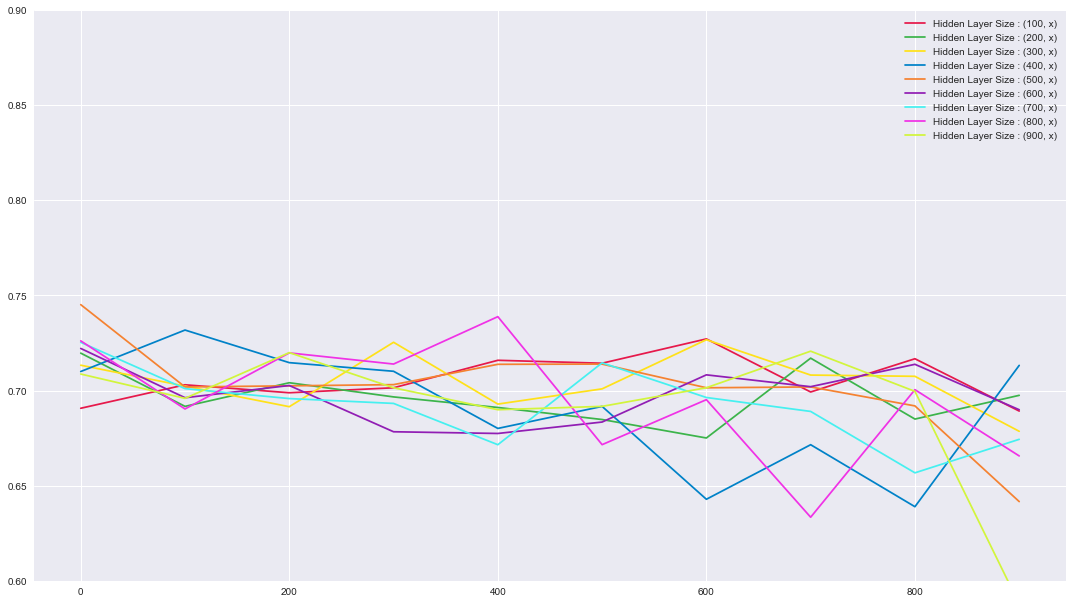

In [34]:
%matplotlib inline

# Affichage des courbes
draw([0.6,0.9], clf_analysed_2, i_max, j_max, ecart_i, ecart_j)


In [42]:
# TODO copier coller le best classifier
clf_analysed_2_demo = MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

clf_analysed_2_demo.fit(source_train_analysed_2, cible_train_analysed_2.values.ravel())



MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(95, 71), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [44]:

for i in range(0,20):
    print("prédit : ", clf_analysed_2_demo.predict(source_test_analysed_2.values[i]),"\n attendu : ",cible_test_analysed_2.values[i])


prédit :  ["S'assoir (depuis position allongée)"] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ["S'assoir (depuis position allongée)"]
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Marcher'] 
 attendu :  ["S'assoir (chaise)"]
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongée)']
prédit :  ['Sauter'] 
 attendu :  ['Sauter']
prédit :  ['Sauter'] 
 attendu :  ['Courrir']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Ne rien faire'] 
 attendu :  ['Ne rien faire']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ['Marcher'] 
 attendu :  ['Marcher']
prédit :  ['Courrir'] 
 attendu :  ['Courrir']
prédit :  ['Se lever (depuis position allongée)'] 
 attendu :  ['Se lever (depuis position allongé